# EDA, FE 세션 추가과제

* 본 과제는 추가과제이므로 수행 및 제출은 자율입니다.

* 시각화 및 전처리를 처음부터 끝까지 자율적으로 수행해보자!

* titanic, airbnb dataset으로 해보셔도 괜찮지만, 이미 했던 내용을 반복하는 것이 크게 의미가 없을 수도 있기 때문에 새로운 데이터를 가져왔습니다. 처음부터 끝까지 전처리 과정을 진행해보고 싶으신 분들에게 추천합니다!

* 문제로 제시된 그래프/전처리 외에 본인이 생각했을 때 필요하다고 생각하는 과정을 진행해주세요

#### 데이터 소개

* 월간 데이콘 신용카드 사용자 연체 예측 AI 경진대회 데이터
* 신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측하는 프로젝트

* 데이터 설명: https://www.dacon.io/competitions/official/235713/talkboard/402821/

* 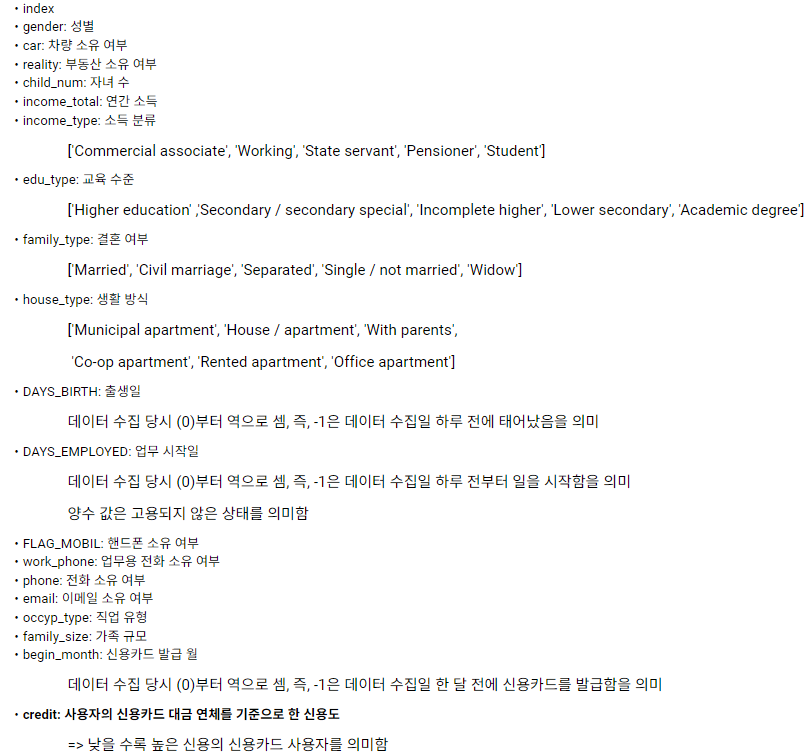


In [311]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [312]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [313]:
path = '/content/drive/MyDrive/Colab Notebooks/와이빅타/'
X_train = pd.read_csv(path+'train_dacon.csv').drop(labels='index', axis=1)
y_train = pd.read_csv(path+'train_label_dacon.csv').drop(labels='index', axis=1)

train = pd.concat([X_train, y_train], axis=1)

In [314]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,365243,1,0,0,0,NaN,2,-53,1
1,F,N,N,1,157500.0,Working,Higher education,Married,House / apartment,-15773,-309,1,0,1,0,Sales staff,3,-26,0
2,M,Y,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13483,-1816,1,1,1,0,Laborers,2,-9,1
3,F,Y,N,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12270,-150,1,0,1,0,Security staff,4,-12,1
4,M,Y,Y,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,-16175,-2371,1,0,0,0,Drivers,3,-3,1


In [315]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13228 entries, 0 to 13227
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         13228 non-null  object 
 1   car            13228 non-null  object 
 2   reality        13228 non-null  object 
 3   child_num      13228 non-null  int64  
 4   income_total   13228 non-null  float64
 5   income_type    13228 non-null  object 
 6   edu_type       13228 non-null  object 
 7   family_type    13228 non-null  object 
 8   house_type     13228 non-null  object 
 9   DAYS_BIRTH     13228 non-null  int64  
 10  DAYS_EMPLOYED  13228 non-null  int64  
 11  FLAG_MOBIL     13228 non-null  int64  
 12  work_phone     13228 non-null  int64  
 13  phone          13228 non-null  int64  
 14  email          13228 non-null  int64  
 15  occyp_type     9096 non-null   object 
 16  family_size    13228 non-null  int64  
 17  begin_month    13228 non-null  int64  
 18  credit

## **EDA**


> ### **1. 결측치 시각화**




Q1. missingno를 활용한 시각화



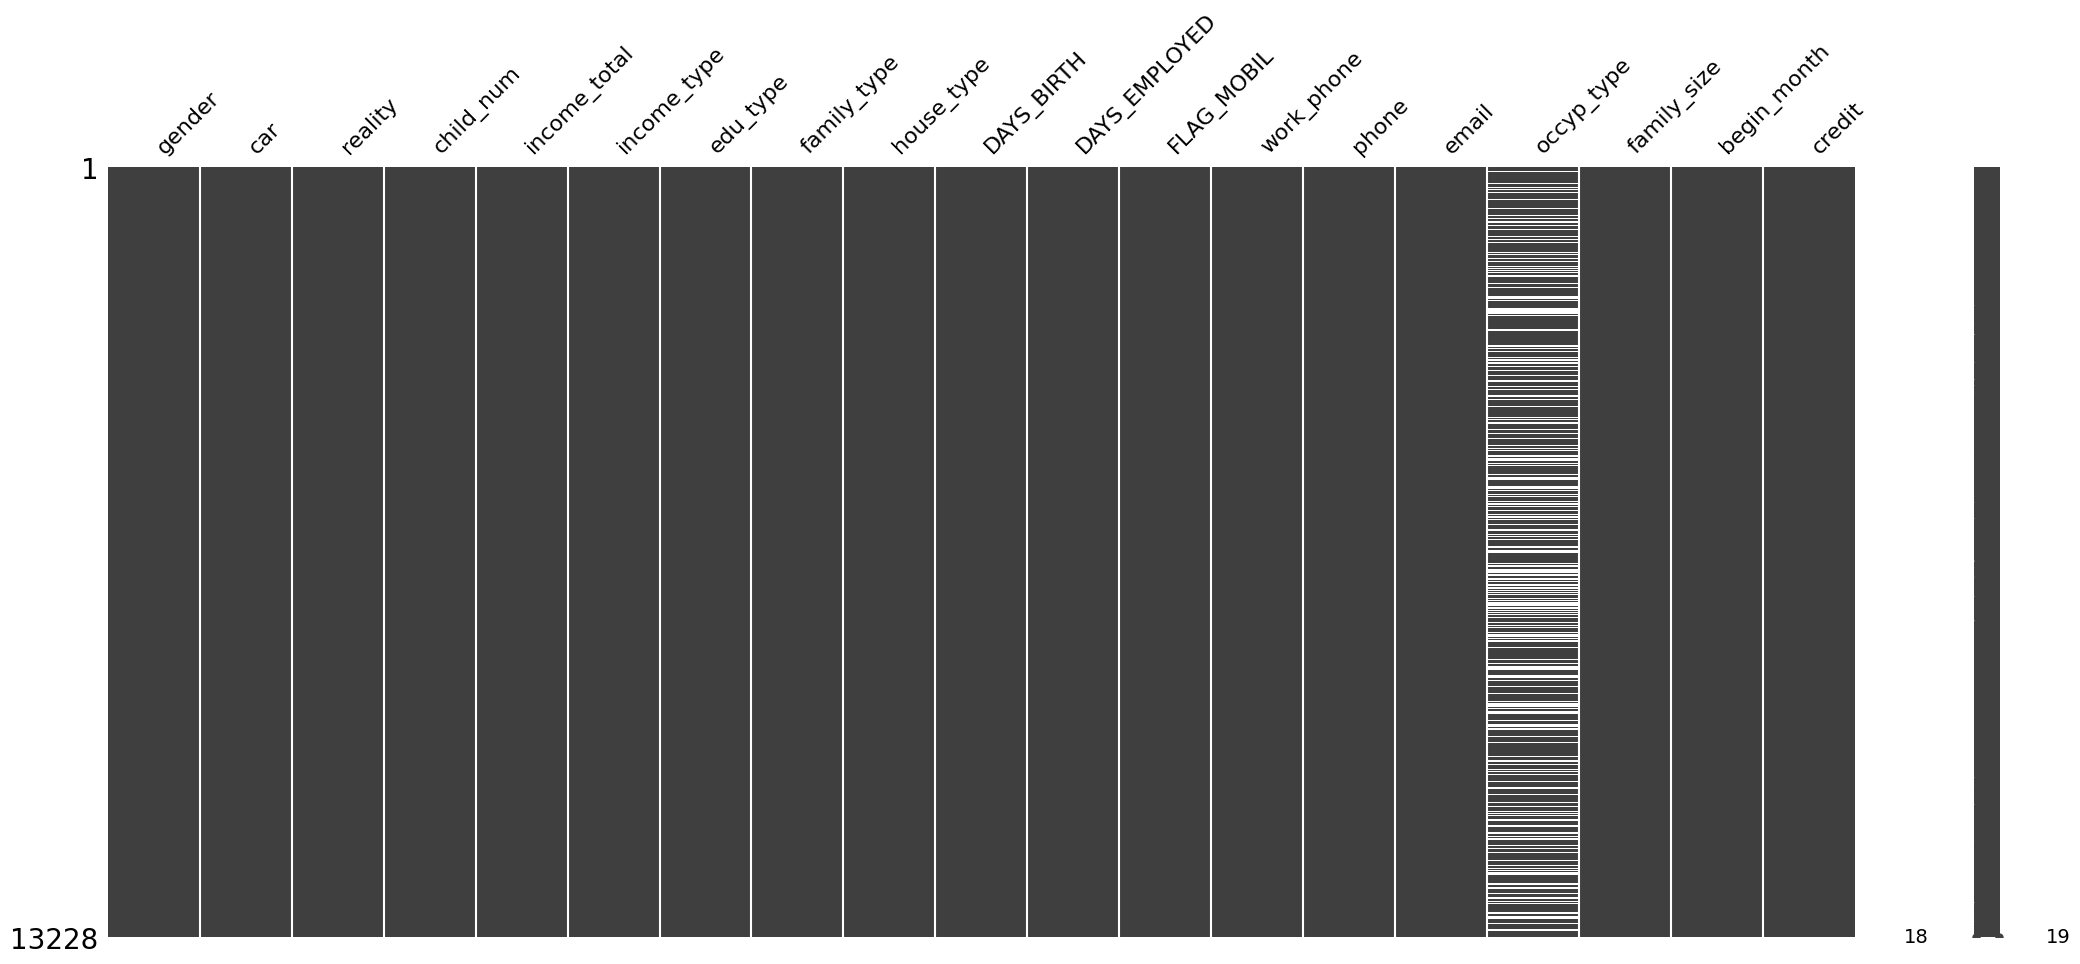

In [316]:
### Q1. missingno를 활용한 시각화 ###
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt

msno.matrix(train)
plt.show()

> ###  **2. 범주형 변수 확인**






**Q2. 범주형 변수에 따른 label 분포 차이를 확인해보세요**

In [317]:
sns.set_palette('Spectral')

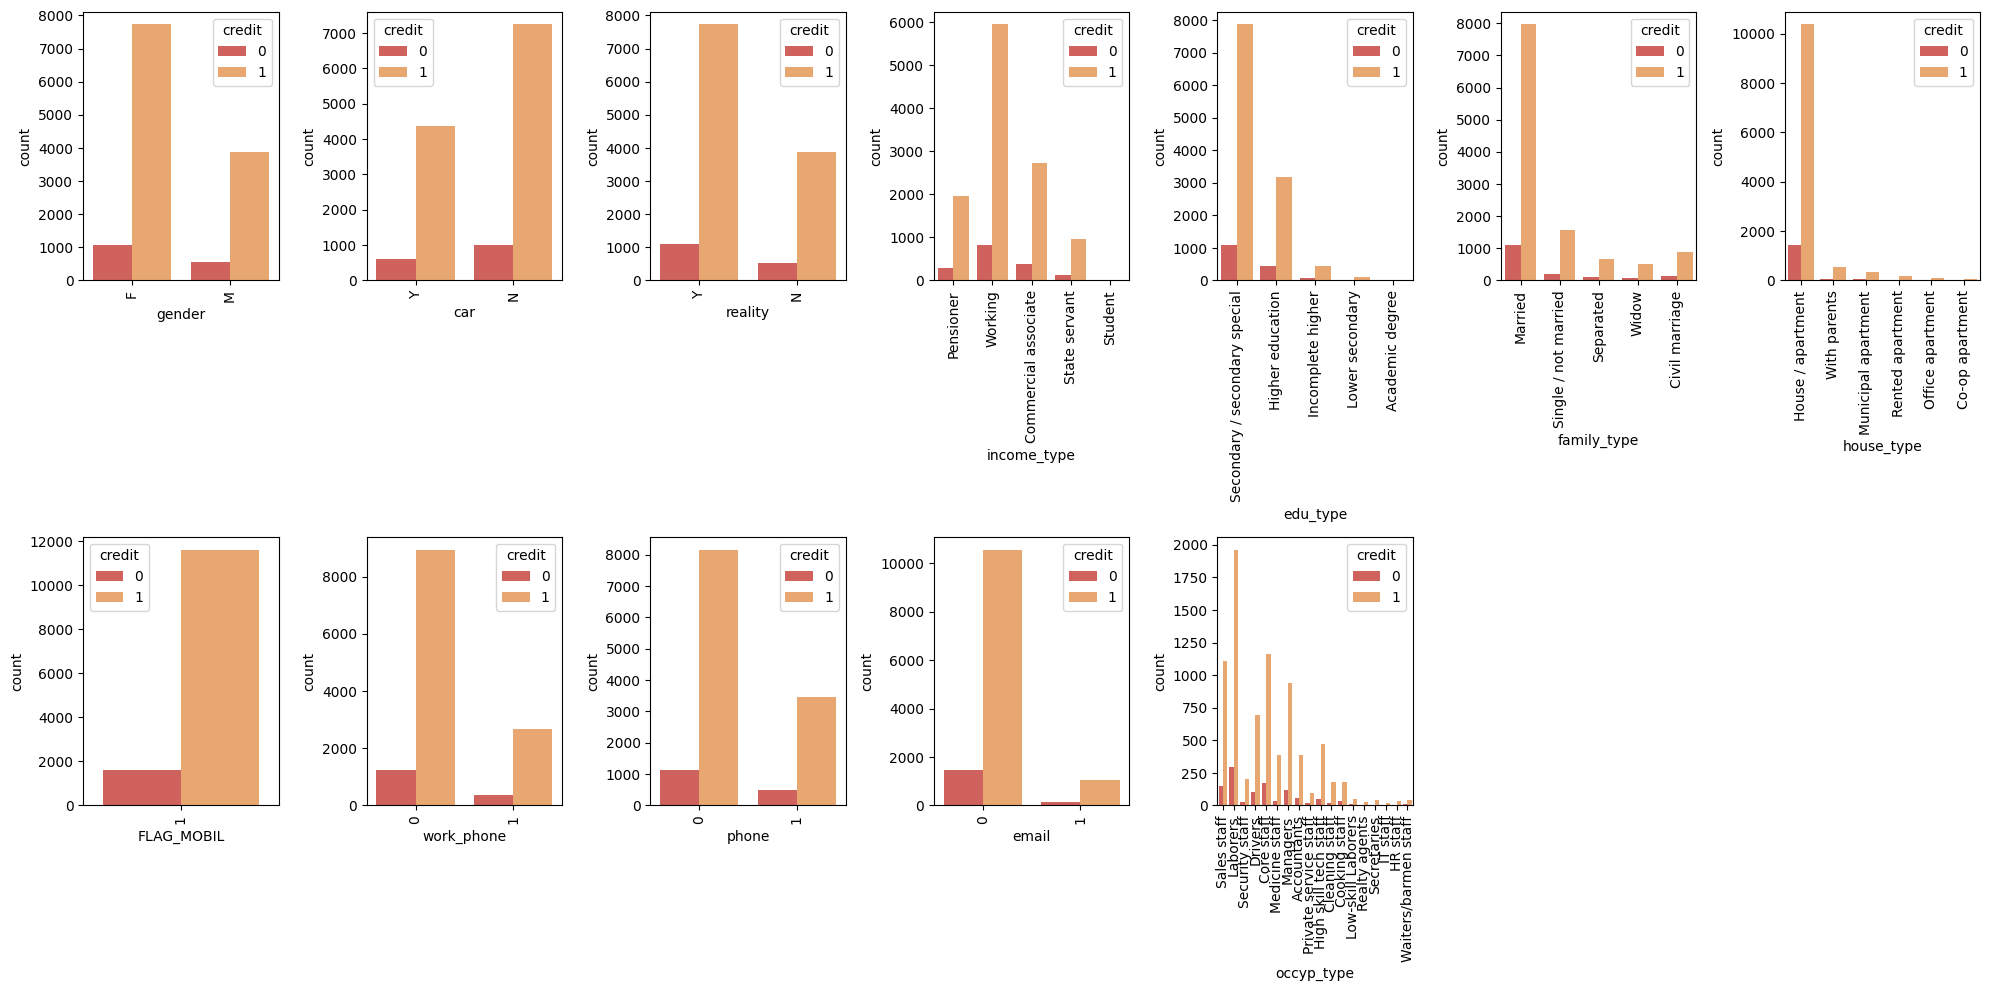

In [318]:
num_list=['child_num', 'family_size', 'begin_month', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

cate_list = list(train.columns)
for x in num_list :
  cate_list.remove(x)
cate_list.remove('credit')

plt.figure(figsize=(20,10))
n=1
for v in cate_list:
    ax = plt.subplot(2,7,n)
    plt.xticks(rotation=90)
    sns.countplot(x=v, hue = 'credit', data=train)
    n+=1
plt.tight_layout()

Q3. occyp_type의 카테고리에 어떤 것이 있는지 확인

In [319]:
# occyp_type

train['occyp_type'].unique()

array([nan, 'Sales staff', 'Laborers', 'Security staff', 'Drivers',
       'Core staff', 'Medicine staff', 'Managers', 'Accountants',
       'Private service staff', 'High skill tech staff', 'Cleaning staff',
       'Cooking staff', 'Low-skill Laborers', 'Realty agents',
       'Secretaries', 'IT staff', 'HR staff', 'Waiters/barmen staff'],
      dtype=object)

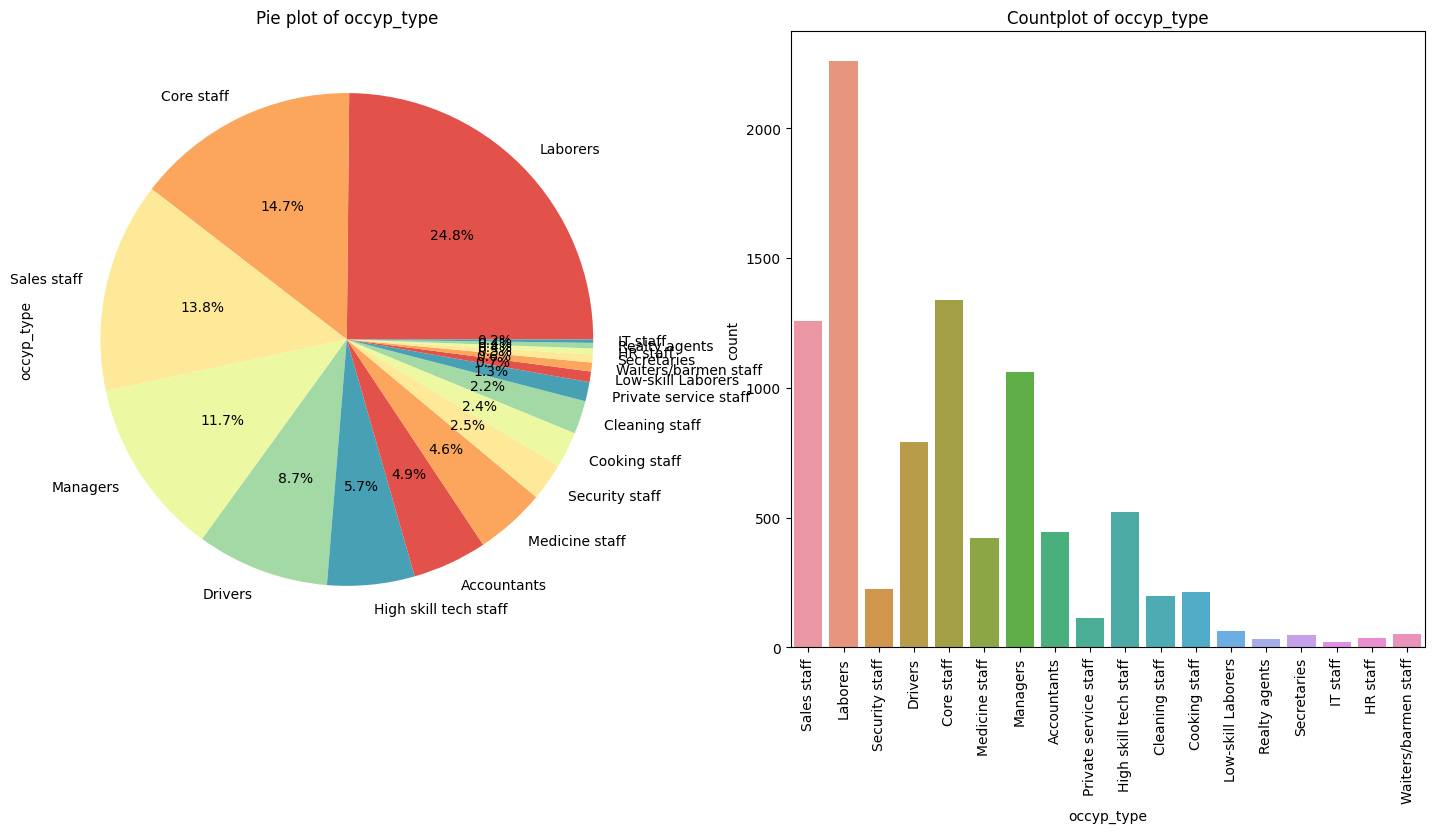

In [320]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['occyp_type'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Pie plot of occyp_type');
sns.countplot(x = train['occyp_type'],ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Countplot of occyp_type');



> ### **3. 연속형 변수 확인**



**Q4. 히스토그램**

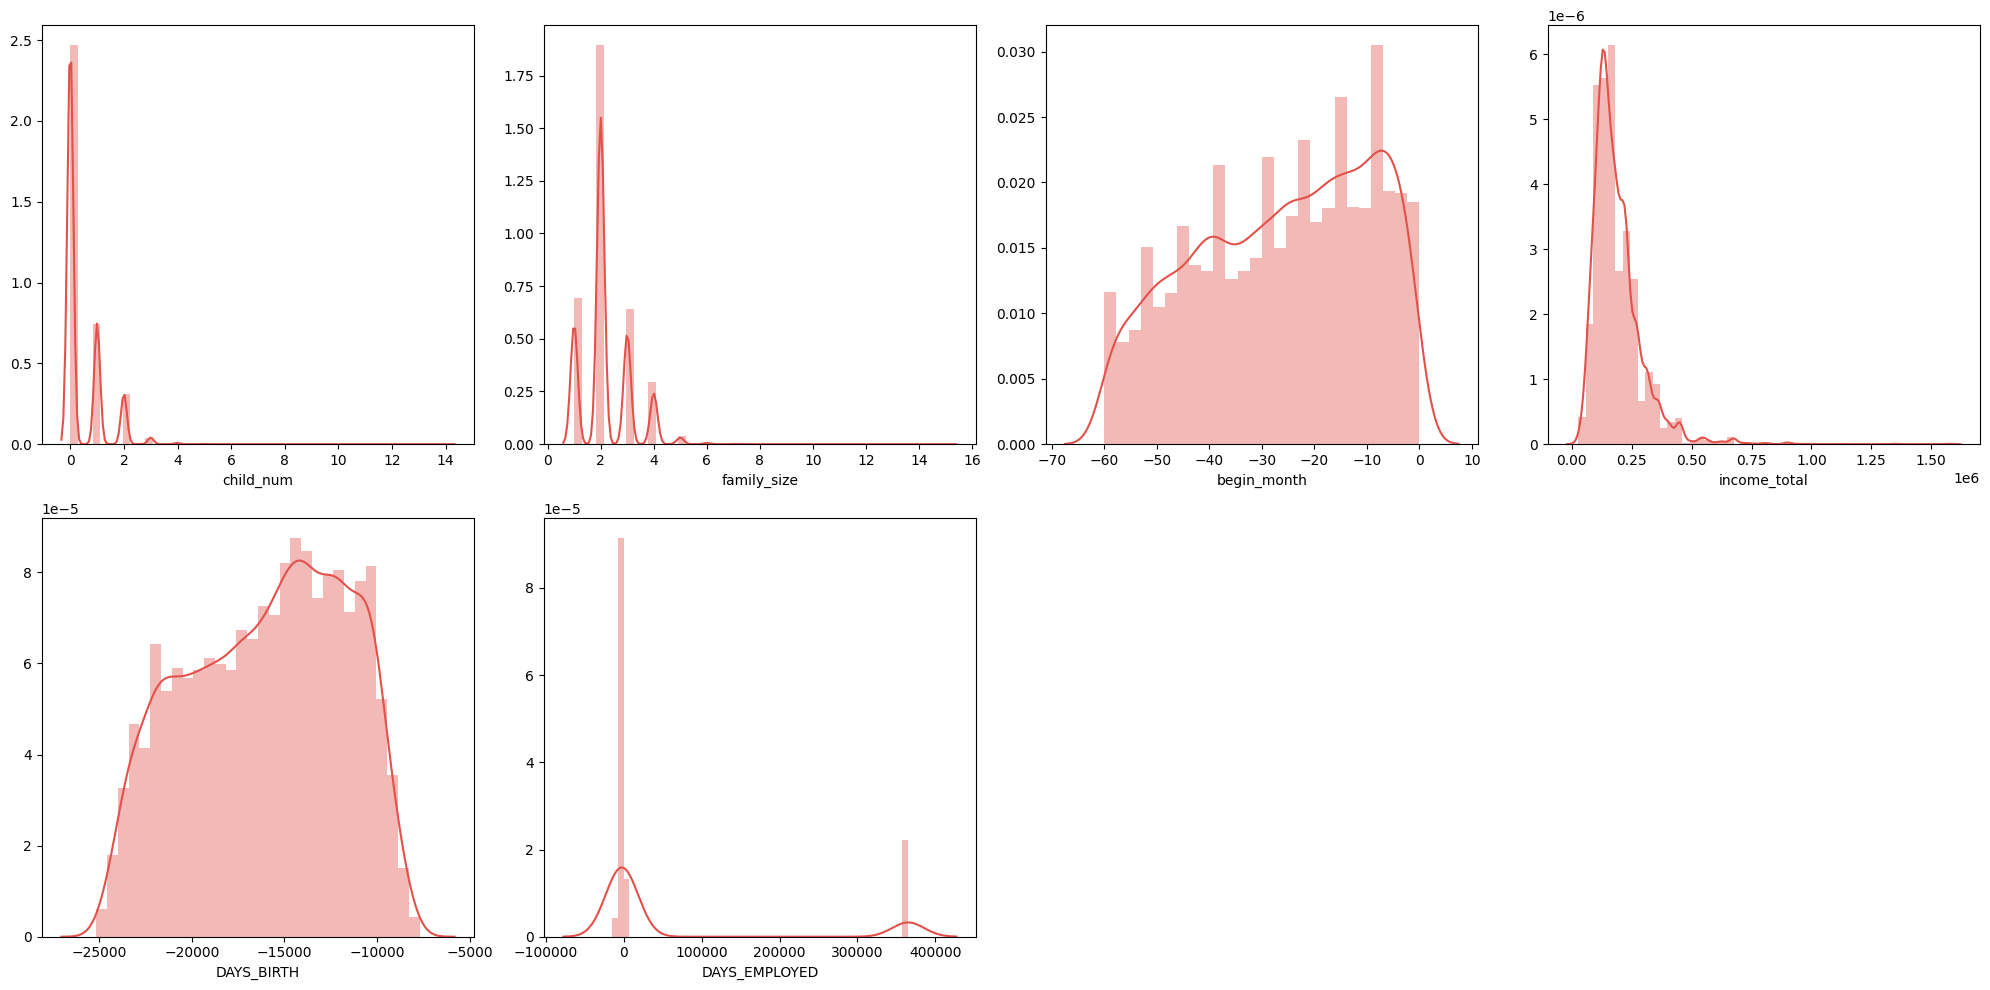

In [321]:
### histogram

num_list=['child_num', 'family_size', 'begin_month', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

plt.figure(figsize=(20,10))
n=1
for v in num_list:
    ax = plt.subplot(2,4,n)
    sns.distplot(train[v])
    plt.ylabel('')
    n+=1
plt.tight_layout()

> ### **4. 변수간의 상관관계 확인**

Q5. income type에 따른 income total의 값을 확인해보세요

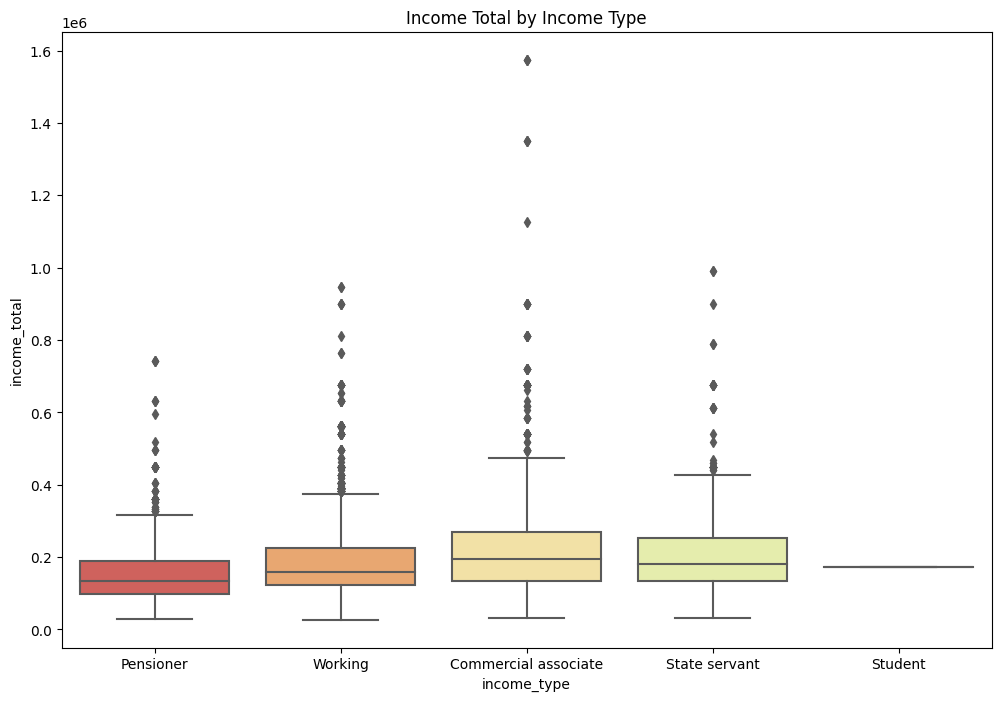

In [322]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'income_type', y = 'income_total', data = train)
plt.title('Income Total by Income Type');

Q6. 상관관계 확인하는 히트맵 만들기

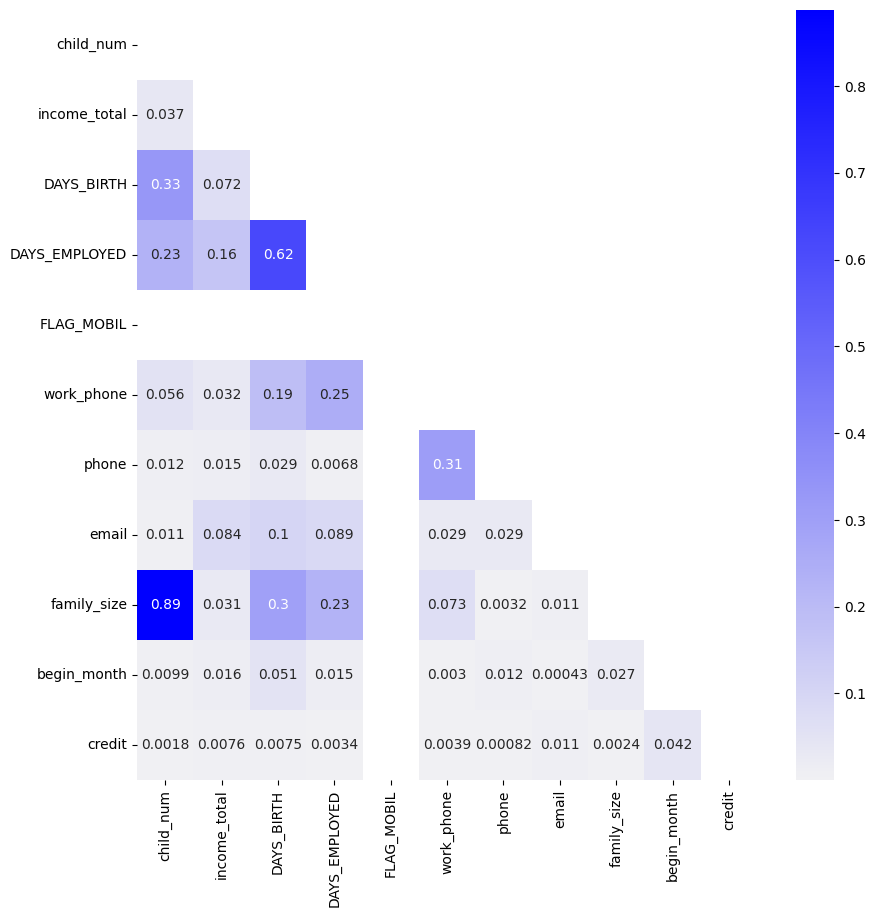

In [323]:
cmap = sns.light_palette("blue", as_cmap = True)
plt.figure(figsize=(10,10))
corr_matrix = train.corr()
abs_corr_matrix = np.abs(corr_matrix)

mask = np.zeros_like(abs_corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(abs_corr_matrix, annot = True, cmap = cmap, mask = mask)
plt.show()

## **데이터 전처리**

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
path = '/content/drive/MyDrive/Colab Notebooks/와이빅타/'
X_train = pd.read_csv(path+'train_dacon.csv').drop(labels='index', axis=1)
y_train = pd.read_csv(path+'train_label_dacon.csv').drop(labels='index', axis=1)

train = pd.concat([X_train, y_train], axis=1)

In [326]:
X = train.drop('credit',axis=1)
y = train['credit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=123)
print('X_train shape : ',X_train.shape)
print('X_test shape : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (9921, 18)
X_test shape :  (3307, 18)
y_train shape :  (9921,)
y_test shape :  (3307,)


In [327]:
### 필요한 모듈을 import ###

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

### 1. 결측치 처리

In [328]:
X_train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3101
family_size         0
begin_month         0
dtype: int64

* occyp_type의 결측치를 대체해주세요.

In [329]:
### occyp_type 결측치 대체

# occyp_type 변수의 결측치는 직업이 없음으로 판단하고, 'NaN' 문자열로 대체
X_train_na = X_train.copy()
X_train_na.fillna('NaN', inplace=True)

In [330]:
X_train_na.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
dtype: int64

In [331]:
### occyp_type 결측치 대체

# occyp_type 변수의 결측치는 직업이 없음으로 판단하고, 'NaN' 문자열로 대체
X_test_na = X_test.copy()
X_test_na.fillna('NaN', inplace=True)

In [332]:
X_test_na.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
dtype: int64

### 2. 이상치 처리

* 앞서 살펴본 변수별 탐색 과정에서, 연속형 변수 중 이상치가 있다고 판단한 child_num, family_size 변수에 대해 이상치를 제거하기로 함

In [333]:
train_na = pd.concat([X_train_na, y_train], axis=1)

In [334]:
test_na = pd.concat([X_test_na, y_test], axis=1)

In [335]:
train_na['child_num'].value_counts()

0     6851
1     2069
2      858
3      116
4       22
5        3
14       2
Name: child_num, dtype: int64

In [336]:
train_na['family_size'].value_counts()

2     5221
1     1953
3     1806
4      806
5      110
6       20
7        3
15       2
Name: family_size, dtype: int64

child_num은 4 이상인 데이터, family_size는 6 이상인 데이터들을 삭제하기로 결정

In [337]:
train_na = train_na[(train_na['child_num'] < 4)]
train_na = train_na[(train_na['family_size'] < 6)]

In [338]:
print(len(train_na))

9894


### 3-1. 범주형 변수 - 이진변수 변환

In [339]:
### feature들 중 이진변수를 확인하고 올바른 전처리를 해주세요.
cate_list

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'FLAG_MOBIL',
 'work_phone',
 'phone',
 'email',
 'occyp_type']

In [340]:
binary_list = cate_list.copy()
for i in ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type'] :
  binary_list.remove(i)

train_na['gender'] = train_na['gender'].replace(['F','M'],[0,1])
train_na['car'] = train_na['car'].replace(['N','Y'], [0,1])
train_na['reality'] = train_na['reality'].replace(['N','Y'], [0,1])

train_na[binary_list]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
12971,0,0,0,1,0,0,0
9841,0,0,1,1,1,0,0
6774,0,0,1,1,1,1,0
11065,0,0,1,1,0,0,0
7148,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...
5714,0,0,1,1,0,0,0
6199,0,1,0,1,1,1,0
6633,0,0,0,1,1,0,0
1811,0,0,1,1,0,0,0


In [341]:
test_na['gender'] = test_na['gender'].replace(['F','M'],[0,1])
test_na['car'] = test_na['car'].replace(['N','Y'], [0,1])
test_na['reality'] = test_na['reality'].replace(['N','Y'], [0,1])

test_na[binary_list]

,gender,car,reality,FLAG_MOBIL,work_phone,phone,email
7875,1,0,1,1,0,0,0
9194,0,0,0,1,0,0,0
9095,1,1,1,1,0,0,0
11612,0,1,0,1,1,1,0
3502,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...
6474,1,1,0,1,1,1,1
5275,0,0,0,1,0,1,0
6618,0,0,1,1,0,0,0
12767,0,0,1,1,0,0,0


### 3-2. 범주형 변수 - 나머지 범주형 인코딩

In [342]:
## 이진변수는 이미 처리했기 때문에 제외
categorical_columns = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

In [343]:
## 필요한 인코더 불러오기
label_encoder = LabelEncoder()

* OneHot Encoding vs Label Encoding 중 어떤 것이 더 적합한지, 왜 그런지 한줄로 적어주세요

> 다범주 변수가 5개이고, 특히 occyp_type 변수는 범주가 여러 개이므로 onehot encoding을 하는 경우 변수가 지나치게 많아져, 과적합에 걸리거나 예측성능이 떨어지기 쉬움. 따라서 label encoding 선택

In [344]:
### 인코딩 진행 ###

for i in categorical_columns :
  label_encoder = LabelEncoder()
  train_encoded = label_encoder.fit_transform(train_na[i])
  train_na[i] = train_encoded
  test_encoded = label_encoder.transform(test_na[i])
  test_na[i] = test_encoded

# **Feature Engineering**

### 1. 의미없는 변수 제거

* 주어진 feature 중 의미없는 변수가 있습니다. 아래 코드를 통해 확인해보고, 제거해주세요.

In [345]:
### 의미없는 변수 제거 ###
train_na.describe()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
count,9894.000000,9894.000000,9894.000000,9894.000000,9.894000e+03,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.0,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000
mean,0.335052,0.373054,0.665757,0.417728,1.899787e+05,2.376087,3.078735,1.382656,1.275824,-15983.770669,59968.143218,1.0,0.233980,0.299474,0.089448,9.155953,2.180817,-26.250354,0.878310
std,0.472032,0.483641,0.471749,0.697900,1.053080e+05,1.734750,1.351185,0.967440,0.937891,4194.909345,138282.009808,0.0,0.423381,0.458051,0.285404,4.297540,0.878297,16.606069,0.326944
min,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,-19421.000000,-3162.500000,1.0,0.000000,0.000000,0.000000,6.000000,2.000000,-40.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.000000,4.000000,1.000000,1.000000,-15541.000000,-1526.500000,1.0,0.000000,0.000000,0.000000,10.000000,2.000000,-25.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,-12488.000000,-401.000000,1.0,0.000000,1.000000,0.000000,12.000000,3.000000,-12.000000,1.000000
max,1.000000,1.000000,1.000000,3.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,-7757.000000,365243.000000,1.0,1.000000,1.000000,1.000000,18.000000,5.000000,0.000000,1.000000


모든 데이터가 1인 FLAG_MOBIL 변수를 제거

In [346]:
train_new = train_na.drop(columns = [ 'FLAG_MOBIL'])
test_new = test_na.drop(columns = ['FLAG_MOBIL'])

### 2. 파생변수 생성 및 변수 변환

* 범주형 변수를 변형해 지표가 되는 feature를 새로 제작하기, 칼럼 값 세분화하기
* 도메인 지식을 바탕으로 변수들을 합쳐 새로운 변수 형성하기 등

적절한 파생변수를 1개 이상 생성하세요.

#### 연속형 변수의 형태 변환

DAYS_EMPLOYED 변수의 데이터 중 양수인 것들은 무직으로 판단해 모두 0으로 변환

In [347]:
train_new['DAYS_EMPLOYED'] = np.where(train_new['DAYS_EMPLOYED'] > 0, 0, train_new['DAYS_EMPLOYED'])
test_new['DAYS_EMPLOYED'] = np.where(test_new['DAYS_EMPLOYED'] > 0, 0, test_new['DAYS_EMPLOYED'])

음수인 연속형 변수들을 양수로 변환

In [348]:
cols = ['begin_month', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

for x in cols :
  train_new[x] = train_new[x] * (-1)
  test_new[x] = test_new[x] * (-1)

#### DAYS_BIRTH 변수 변환

DAYS_BIRTH 변수의 단위를 년으로 바꿔 Age 변수로 변환

In [349]:
train_new['Age'] = train_new['DAYS_BIRTH'] // 365
test_new['Age'] = test_new['DAYS_BIRTH'] // 365

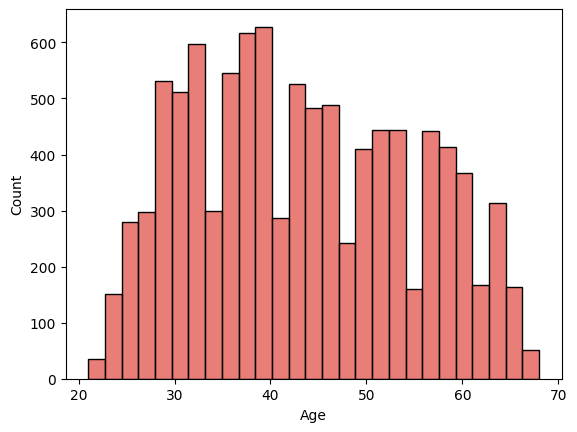

In [350]:
sns.histplot(train_new, x = 'Age');

AGE 변수보다 좀 더 세밀하게 나이를 표현하기 위해, 연 대신 개월 수로 바꾸기로 결정

In [351]:
train_new['AGE_MONTH']=train_new['DAYS_BIRTH']//30
test_new['AGE_MONTH']=test_new['DAYS_BIRTH']//30

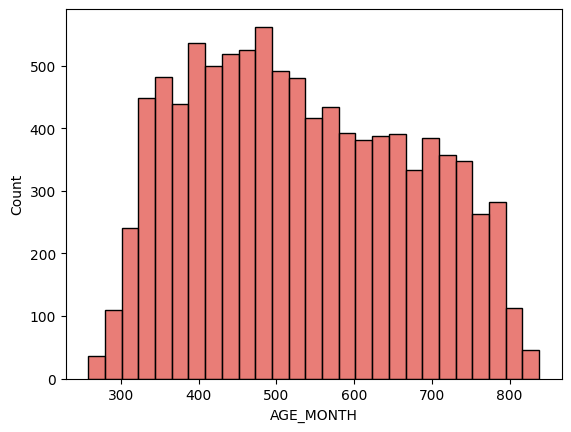

In [352]:
sns.histplot(train_new, x = 'AGE_MONTH');

#### DAYS_EMPLOYED 변수 변환

AGE와 마찬가지로 DAYS_EMPLOYED의 단위를 년으로 바꿔, 근속한 기간으로 근속 몇 개월 차인지 변수 추가

In [353]:
train_new['MONTH_EMPLOYED'] = train_new['DAYS_EMPLOYED'] // 30
test_new['MONTH_EMPLOYED'] = test_new['DAYS_EMPLOYED'] // 30

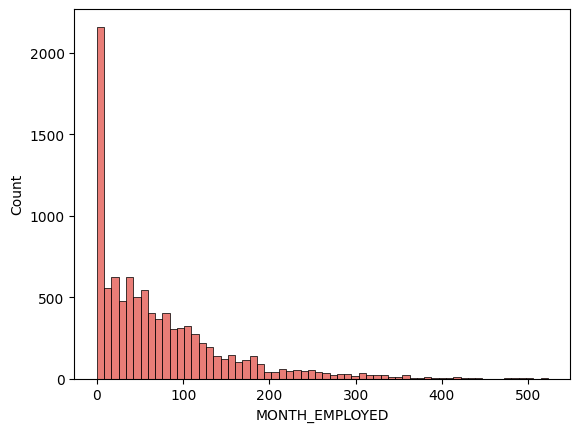

In [354]:
sns.histplot(train_new, x = 'MONTH_EMPLOYED');

#### Employed per Age 변수 추가

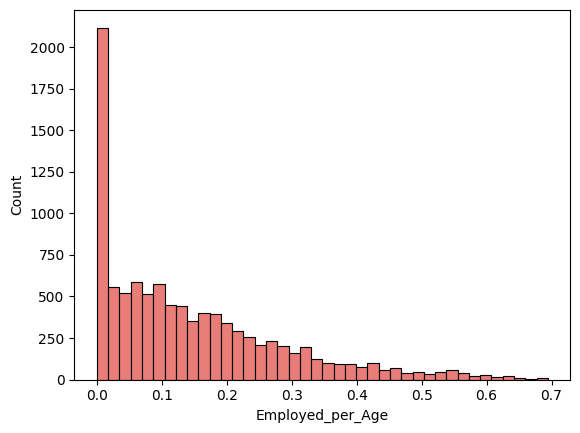

In [355]:
train_new['Employed_per_Age'] = train_new['MONTH_EMPLOYED']/train_new['AGE_MONTH']
sns.histplot(train_new, x = 'Employed_per_Age');

In [356]:
test_new['Employed_per_Age'] = test_new['MONTH_EMPLOYED']/test_new['AGE_MONTH']

#### EMPLOYED_START 변수 추가

추가적으로 DAYS_BIRTH에서 DAYS_EMPLOYED를 빼 어느 나이에 일을 시작했는지 변수 추가

In [357]:
train_new['EMPLOYED_START'] = (train_new['DAYS_BIRTH'] - train_new['DAYS_EMPLOYED']) // 30
test_new['EMPLOYED_START'] = (test_new['DAYS_BIRTH'] - test_new['DAYS_EMPLOYED']) // 30

In [358]:
train_new[['AGE_MONTH', 'MONTH_EMPLOYED', 'EMPLOYED_START']]

,AGE_MONTH,MONTH_EMPLOYED,EMPLOYED_START
12971,776,0,776
9841,526,72,453
6774,370,69,301
11065,526,43,482
7148,325,97,228
...,...,...,...
5714,395,150,245
6199,303,23,280
6633,440,88,351
1811,564,18,545


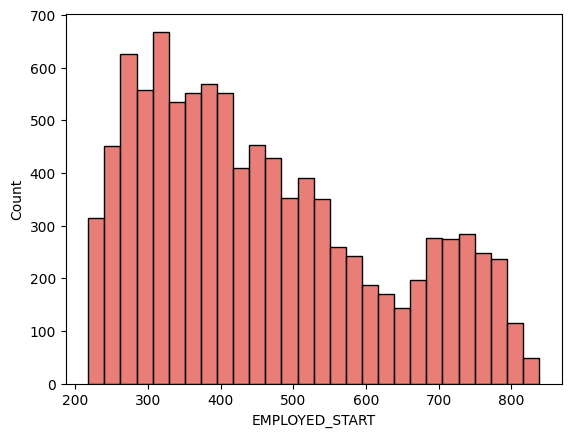

In [359]:
sns.histplot(train_new, x = 'EMPLOYED_START');

#### Non-Child_Num 변수 추가

In [360]:
train_new['Non-Child_Num'] = train_new['family_size'] - train_new['child_num']
train_new['Non-Child_Num'].value_counts()

2    7552
1    2340
0       2
Name: Non-Child_Num, dtype: int64

In [361]:
test_new['Non-Child_Num'] = test_new['family_size'] - test_new['child_num']
test_new['Non-Child_Num'].value_counts()

2    2542
1     765
Name: Non-Child_Num, dtype: int64

#### Income_per_family 변수 추가

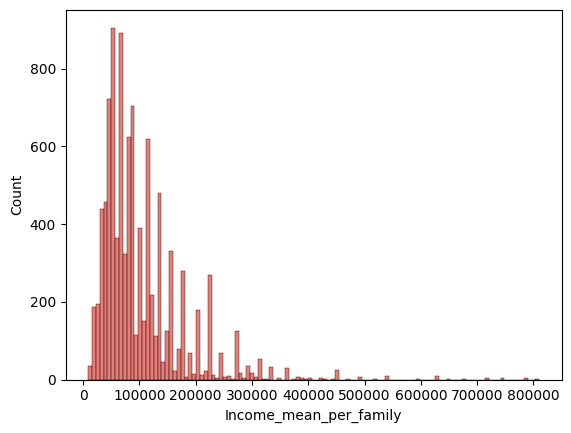

In [362]:
train_new['Income_mean_per_family'] = train_new['income_total'] / train_new['family_size']
sns.histplot(train_new, x = 'Income_mean_per_family');

In [363]:
test_new['Income_mean_per_family'] = test_new['income_total'] / test_new['family_size']

#### Income_per_Age 변수 추가

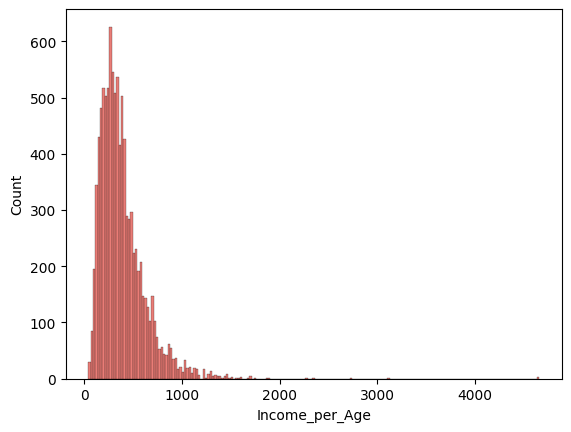

In [364]:
train_new['Income_per_Age'] = train_new['income_total']/train_new['AGE_MONTH']
sns.histplot(train_new, x = 'Income_per_Age');

In [365]:
test_new['Income_per_Age'] = test_new['income_total']/test_new['AGE_MONTH']

In [366]:
train_new = train_new.drop(columns = ['Age', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])
test_new = test_new.drop(columns = ['Age', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])

## 3. 성분 축소 (선택)

* 다중공선성은 모델의 예측력에 영향을 끼치지 않으므로 이를 고려한 변수 선택 및 삭제는 진행하지 않음

* Decision Tree 모델을 기반으로 한 RFE 방법으로 변수 선택을 진행함
> * DT 기반의 RFE로 변수를 선택한 후, RandomForest로 선택한 변수로 validation을 진행해 가장 높은 f1_score를 기록한 변수 개수를 선택
> * 변수는 최소 5개 이상 선택하도록 설정

In [367]:
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

In [368]:
X = train_new.drop('credit',axis=1)
y = train_new['credit']

In [369]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=123)

In [370]:
for x in range(5, 23) :
  estimator = DecisionTreeClassifier(random_state=123)
  selector = RFE(estimator, n_features_to_select = x)

  selector = selector.fit(X_train, y_train)
  dt_rfe_X_train = selector.transform(X_train)
  dt_rfe_X_val = selector.transform(X_val)

  rf = RandomForestClassifier(random_state=123)
  rf.fit(dt_rfe_X_train, y_train)
  test_pred = rf.predict(dt_rfe_X_val)
  print('변수 {}개'.format(x))
  print(f1_score(y_val, test_pred))
  print('')

변수 5개
0.9322882647507076

변수 6개
0.9321405193104952

변수 7개
0.9324885296045445

변수 8개
0.9335373852208133

변수 9개
0.9337125355502078

변수 10개
0.9325153374233127

변수 11개
0.9318131988598992

변수 12개
0.9325448970652651

변수 13개
0.9316389132340052

변수 14개
0.9332748024582967

변수 15개
0.9310496267018006

변수 16개
0.9316089434458571

변수 17개
0.9322516991887744

변수 18개
0.9318131988598992

변수 19개
0.9314586994727592

변수 20개
0.9317233809001096

변수 21개
0.9311027955095751

변수 22개
0.9310496267018006



* 확인 결과, 가장 높은 f1_score를 기록한 변수 개수인 9개를 선택

In [371]:
estimator = DecisionTreeClassifier(random_state=123)
selector = RFE(estimator, n_features_to_select = 9)
selector = selector.fit(X_train, y_train)

In [372]:
dt_rfe_features = selector.support_
X_train.columns[dt_rfe_features]

Index(['income_total', 'occyp_type', 'begin_month', 'AGE_MONTH',
       'MONTH_EMPLOYED', 'Employed_per_Age', 'EMPLOYED_START',
       'Income_mean_per_family', 'Income_per_Age'],
      dtype='object')

* 선택한 변수들로 기존 X_train과 X_test의 변수를 선택

In [373]:
X_train = train_new.drop('credit',axis=1)
y_train = train_new['credit']

X_test = test_new.drop('credit',axis=1)
y_test = test_new['credit']

In [374]:
dt_rfe_X_train = selector.transform(X_train)
dt_rfe_X_test = selector.transform(X_test)

In [375]:
dt_rfe_X_train.shape

(9894, 9)

> 결론적으로 기존의 train 데이터를, train 데이터와 test 데이터로 분류하고, 변수는 DT-RFE 방법을 사용해 총 9개의 변수만을 선택함

# **추가의 추가**

* ML에 대해 잘 알고 계신 분은 처리한 데이터를 활용해 분류모델도 돌려보고, 성능 테스트를 해보는 것도 권장드립니다

In [378]:
print('class 0의 비율',round(y_train.value_counts()[0]/(y_train.value_counts()[0]+y_train.value_counts()[1]),3))
print('class 1의 비율',round(y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1]),3))

class 0의 비율 0.122
class 1의 비율 0.878


* target 변수의 불균형이 심함을 파악할 수 있음
> 따라서 tree 기반의 앙상블 모델을 실험하되, target 변수에 weight를 부여

In [379]:
weights={0: 8.8, 1: 1.2}

In [382]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [383]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

* 하이퍼 파라미터 튜닝(RandomizedSearchCV)

#### RandomForest

In [386]:
rf_params = {
    'n_estimators': np.arange(100, 300, 2),
    'max_features': np.arange(0, 0.7, 0.05),
    'max_depth': np.arange(5, 40, 5),
}

In [387]:
rf = RandomForestClassifier(class_weight = weights, random_state = 123, n_jobs = -1)
rnd_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    scoring='f1',
    n_iter=30,  # 7분 30초 소요
    cv=skf,
    random_state=123,
    n_jobs = -1
)

cv_res = rnd_search.fit(dt_rfe_X_train, y_train)

In [388]:
best_params = cv_res.best_params_
best_score = cv_res.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)

Best Parameters: {'n_estimators': 180, 'max_features': 0.55, 'max_depth': 25}
Best F1 Score: 0.9305232800309945


In [389]:
best_RF = cv_res.best_estimator_
best_RF

RandomForestClassifier(class_weight={0: 8.8, 1: 1.2}, max_depth=25,
                       max_features=0.55, n_estimators=180, n_jobs=-1,
                       random_state=123)

#### LightGBM

In [390]:
!pip install lightgbm

In [391]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

lgbm_params = {
    'learning_rate': np.arange(0.001, 0.1, 0.005),
    'n_estimators': np.arange(200, 400, 5),
    'max_depth': np.arange(1, 6, 1),
    'min_data_in_leaf': np.arange(10, 200, 50),
    'num_leaves': np.arange(20, 70, 5),
}

In [392]:
LGBM = LGBMClassifier(class_weight = weights, random_state = 123)
rnd_search = RandomizedSearchCV(
    estimator=LGBM,
    param_distributions=lgbm_params,
    scoring='f1',
    n_iter=30,  # 20분 소요
    cv=skf,
    random_state=123,
)
cv_res_lgbm = rnd_search.fit(dt_rfe_X_train, y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] min_data_in_leaf is set=160, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=160
[LightGBM] [Warning] min_data_in_leaf is set=160, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=160
[LightGBM] [Warning] min_data_in_leaf is set=160, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=160
[LightGBM] [Info] Number of positive: 6952, number of negative: 963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1663
[LightGBM] [Info] Number of 

In [393]:
print('Best Hyperparameters:', cv_res_lgbm.best_params_)
print('Best F1:', cv_res_lgbm.best_score_)

Best Hyperparameters: {'num_leaves': 60, 'n_estimators': 210, 'min_data_in_leaf': 10, 'max_depth': 1, 'learning_rate': 0.006}
Best F1: 0.881750525976639


In [394]:
best_LGBM = cv_res_lgbm.best_estimator_
best_LGBM

LGBMClassifier(class_weight={0: 8.8, 1: 1.2}, learning_rate=0.006, max_depth=1,
               min_data_in_leaf=10, n_estimators=210, num_leaves=60,
               random_state=123)

#### XGBoost

In [395]:
!pip install xgboost

In [396]:
from xgboost import XGBClassifier

XGB_params = {
    'learning_rate': np.arange(0.001, 0.1, 0.005),
    'n_estimators': np.arange(200, 400, 5),
    'max_depth': [2, 3, 4, 5, 6],
    'subsample': np.arange(0.4, 1.0, 0.2),
}

In [397]:
XGB = XGBClassifier(class_weight = weights, random_state = 123)
rnd_search = RandomizedSearchCV(
    estimator=XGB,
    param_distributions=XGB_params,
    scoring='f1',
    n_iter=15,  # 20분 소요
    cv=skf,
    random_state=123,
)
cv_res_xgb = rnd_search.fit(dt_rfe_X_train, y_train)

In [398]:
print('Best Hyperparameters:', cv_res_xgb.best_params_)
print('Best F1:', cv_res_xgb.best_score_)

Best Hyperparameters: {'subsample': 0.6000000000000001, 'n_estimators': 360, 'max_depth': 5, 'learning_rate': 0.046}
Best F1: 0.9353348718371487


In [399]:
best_XGB = cv_res_xgb.best_estimator_
best_XGB

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 8.8, 1: 1.2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.046, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=360, n_jobs=None,
              num_parallel_tree=None, ...)

#### CatBoost

In [400]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [401]:
from catboost import CatBoostClassifier

cat_params = {
    'learning_rate': np.arange(0.0001, 0.1, 0.005),
    'depth' : np.arange(2,10,2),
    'n_estimators': np.arange(150, 400, 5)}

In [402]:
catboost = CatBoostClassifier(class_weights = weights, early_stopping_rounds=30, verbose=200, random_state = 123)

rnd_search = RandomizedSearchCV(
    estimator=catboost,
    param_distributions=cat_params,
    scoring='f1',
    n_iter=15,
    cv=skf,
    random_state=123,
)
cv_cat = rnd_search.fit(dt_rfe_X_train, y_train)

0:	learn: 0.6897323	total: 79.5ms	remaining: 24.6s
200:	learn: 0.4520706	total: 4.56s	remaining: 2.48s
309:	learn: 0.3599910	total: 6.74s	remaining: 0us
0:	learn: 0.6896908	total: 30.9ms	remaining: 9.56s
200:	learn: 0.4594366	total: 5.41s	remaining: 2.93s
309:	learn: 0.3664281	total: 7.91s	remaining: 0us
0:	learn: 0.6892213	total: 70.5ms	remaining: 21.8s
200:	learn: 0.4597631	total: 8.32s	remaining: 4.51s
309:	learn: 0.3641469	total: 10.8s	remaining: 0us
0:	learn: 0.6896984	total: 22.9ms	remaining: 7.07s
200:	learn: 0.4601942	total: 4.25s	remaining: 2.3s
309:	learn: 0.3688365	total: 6.28s	remaining: 0us
0:	learn: 0.6891644	total: 31.4ms	remaining: 9.71s
200:	learn: 0.4495600	total: 6.71s	remaining: 3.64s
309:	learn: 0.3585731	total: 9.61s	remaining: 0us
0:	learn: 0.6906383	total: 21ms	remaining: 7.03s
200:	learn: 0.5038133	total: 4.11s	remaining: 2.74s
334:	learn: 0.4097926	total: 7.28s	remaining: 0us
0:	learn: 0.6906105	total: 21.5ms	remaining: 7.18s
200:	learn: 0.5083958	total: 2.93s

In [403]:
best_params = cv_cat.best_params_
best_score = cv_cat.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score:", best_score)

Best Parameters: {'n_estimators': 310, 'learning_rate': 0.0551, 'depth': 8}
Best F1 Score: 0.8620287359147195


In [404]:
best_CAT = cv_cat.best_estimator_
best_CAT

### 최종 모델 선택

가장 높은 f1 score를 기록한 XGB 모델을 선택

In [408]:
XGB_Best = XGBClassifier(subsample=0.6000000000000001, n_estimators = 360, max_depth = 5, learning_rate= 0.046, class_weight = weights, random_state = 123)

In [409]:
XGB_Best.fit(dt_rfe_X_train, y_train)

result = XGB_Best.predict(dt_rfe_X_test)

f1_score(result, y_test)

0.9352960207052733